The first CNN we trained on the Fashion MNIST-Dataset got up to 91.3% accuracy.
In this experiment we will try to improve the accuracy throug clustering the classes into subclasses and balancing this subclasses.

In [2]:
import torch
import torchvision.transforms as tt
import torchvision
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split

At first we download the FashionMNIST-dataset and convert it to Pytroch-Tensors. The FashionMNIST-dataset consists of 60000 images in the train-set and 10000 images in the test-set.

Many Datasets like CIFAR or FashionMNIST can be downloaded via torchvision. A list of all datasets avaiable with torchvision can be obtained here: https://pytorch.org/docs/stable/torchvision/datasets.html Other custome datasets have to be created form csv-files or other data-sources.

In [3]:
train_set = torchvision.datasets.FashionMNIST("./data", download=True, train=True, transform=tt.Compose([tt.ToTensor()]))           
                         
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                              tt.Compose([tt.ToTensor()])) 

print('Images in train-dataset: {}\nImages in test-dataset: {}'.format(len(train_set), len(test_set)))

Images in train-dataset: 60000
Images in test-dataset: 10000


Now we will split the train-dataset into 10 sub-datasets by label.

In [20]:
# this class will be used to create sub-datasets with the data from the grouped datasets
class sub_sets(Dataset):
    def __init__(self, group):
        self.data = group
        self.n_datapoints = len(group)
    
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return self.n_datapoints
    

# the group dataset function splits the dataset into 10 groups by label    
def group_dataset(dataset):
    images_grouped = [[],[],[],[],[],[],[],[],[],[]]
    for data_point in dataset:
        images_grouped[data_point[1]].append(data_point)
    return images_grouped
    
groups = group_dataset(train_set)

set0, set1, set2, set3, set4, set5, set6, set7, set8, set9 = [sub_sets(groups[x]) for x in range(10)]
sets = [set0, set1, set2, set3, set4, set5, set6, set7, set8, set9]

To confirm if the dataset is balanced or inbalanced, a histogram is created, which shows the number of images per class.

Text(0, 0.5, 'images')

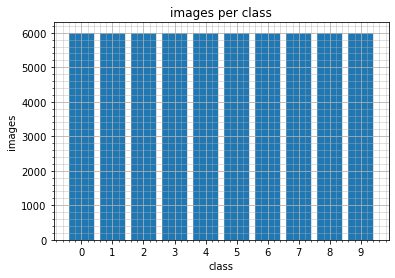

In [26]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.bar([a for a in range(10)], height=[len(ds) for ds in sets], label='number of images')
plt.xticks([a for a in range(10)], [a for a in range(10)]) 
ax1.minorticks_on()
ax1.grid(b='True', alpha=0.5, which='minor') 
ax1.grid(alpha=1) 
plt.title('images per class')
ax1.set_xlabel('class')
ax1.set_ylabel('images')

As we can see: The dataset is compleatly balanced.